In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import sqlite3
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity


ratings = pd.read_sql("""
    select
        author_id,
        podcast_id,
        rating,
        created_at,
        case when rating < 3 then 0
            when rating > 4 then 2
            else 1
        end as sentiment
    from reviews
""", sqlite3.connect("database.sqlite"))

podcasts = pd.read_sql("""
    select
        podcast_id,
        title
    from podcasts
""", sqlite3.connect("database.sqlite"))

categories = pd.read_sql("""
    select
        podcast_id,
        category
    from categories
""", sqlite3.connect("database.sqlite"))

In [116]:
_df.groupby('author_id').mean()#.sort_values(by='podcast_id', ascending=False).head(15)

,rating,sentiment
author_id,,
00000CF430A92DE,5.0,2.00
000013E13E072B9,5.0,2.00
000013E7957EDF4,5.0,2.00
000018E94673274,3.0,1.00
00001F02949BE56,5.0,2.00
...,...,...
FFFFC8BD6993D9C,5.0,2.00
FFFFCC2B43EE26D,5.0,2.00
FFFFDA3AAFE7590,4.0,1.25


In [143]:
_df = pd.merge(ratings, podcasts, on='podcast_id', how='inner')
df = pd.merge(_df, categories, on='podcast_id', how='inner')

In [102]:
author_filter = _df.groupby('author_id').count().sort_values(by='title', ascending=False).head(2500).index.to_list()

In [104]:
### read a csv file and extract the shopping items list

baskets = [list(set(a[1]['title'].tolist())) for a in list(df.query(f'author_id in {author_filter}').groupby('author_id'))]
baskets
### total size of baskets

[['Deep Leadership',
  'Multifamily Investor Situation Room',
  'Multifamily Investor Nation',
  'The Parasha Podcast',
  'Investing In The U.S.',
  'Middle Class Money',
  'Target Market Insights: Multifamily + Marketing',
  'Think Unbroken with Michael Unbroken | CPTSD, TRAUMA and Mental Health Healing Podcast',
  'True Multifamily',
  'Melanin Boulevard',
  'Dwellynn Show - Financial Freedom through Real Estate Investing',
  'The Think Realty Podcast',
  'Compression Podcast',
  'Powers Hour',
  'Multifamily Missteps Hosted by Jerome Myers',
  'Real Estate Experiment',
  'Do It With Dan',
  'Abundant Culture Podcast',
  'Pandanomics',
  'Keep on Pushing by Devon Harris',
  'Weiss Advice',
  'Commercial Real Estate Academy Podcast',
  'Content Is Profit',
  'Rental Property Owner & Real Estate Investor Podcast',
  'We Build Great Apartment Communities',
  'Diary of an Apartment Investor',
  'Accelerated Investor Podcast'],
 ['The Joe Rogan Experience',
  'History on Fire',
  'Fixed A

In [105]:
### unique #items

items = set(list(np.concatenate(baskets).flat))
len(items)

16569

In [106]:
### hash all singletons
df_item_hash = pd.DataFrame(range(len(items)), index = list(items), columns =['hashcode'], dtype=int)
df_item_hash

,hashcode
That's So Retrograde,0
High Scores,1
I Pray You Put This Journal Away,2
Yesteryear's News Today,3
Yesterday’s News Today,4
...,...
Voces de Influencia,16564
Minecraft Mit 9Bit,16565
Hollywood and Byrne,16566
Work/Life Imbalance,16567


In [107]:
### count the items, store the count into the hashed array index

# item_count = pd.DataFrame(np.zeros((len(items),1)), index = list(items), columns =['count'], dtype=int)
item_count_arr = np.zeros((len(items),1))

for b in baskets:
    for item in b:
            idx = df_item_hash.loc[item,'hashcode']
            item_count_arr[idx] += 1
            
### find frequent items with support > s1 (here s1 = 0.02), and hash back from array index to items           
freq_items  = [df_item_hash[df_item_hash['hashcode']==x].index[0] for x in np.where(item_count_arr > 0.04*len(baskets))[0]] 
freq_items

# item_count_arr[item_count['count']>0.02*len(baskets)]
#freq_items['hashcode'] = list(range(1,len(freq_items)+1))

['Smash Boom Best',
 'Women Taking the Lead with Jodi Flynn',
 'Leveling Up with Eric Siu',
 'The Joe Rogan Experience',
 'Legendary Life | Transform Your Body, Upgrade Your Health & Live Your Best Life',
 'Mindfulness Mode',
 'Story Pirates',
 'ADHD reWired',
 'Business Coaching With Join Up Dots - Online Business Success The Easy Way !',
 'Best Real Estate Investing Advice Ever',
 'Crime Junkie',
 'Wisdom-Trek ©',
 'What If World - Stories for Kids',
 "Old Dawg's REI Network with Bill Manassero",
 'The Learning Leader Show With Ryan Hawk',
 'Wow in the World',
 'Rental Income Podcast With Dan Lane',
 'Discover Your Talent–Do What You Love | Build a Career of Success, Satisfaction and Freedom',
 'The Daily',
 'Interactive Body Balance with Mike Daciuk',
 'The Kelly Roach Show',
 'The Ben Shapiro Show',
 'Five Minutes With Dad with Pavlos, Angela, and Nick Pavlidis',
 'Confessions of a Terrible Husband with Nick Pavlidis']

In [108]:
### hash the frequent items (starting from 1)

df_freq_item_hash = pd.DataFrame(range(1,len(freq_items)+1), index=freq_items, columns=['hashcode'])
df_freq_item_hash

,hashcode
Smash Boom Best,1
Women Taking the Lead with Jodi Flynn,2
Leveling Up with Eric Siu,3
The Joe Rogan Experience,4
"Legendary Life | Transform Your Body, Upgrade Your Health & Live Your Best Life",5
Mindfulness Mode,6
Story Pirates,7
ADHD reWired,8
Business Coaching With Join Up Dots - Online Business Success The Easy Way !,9
Best Real Estate Investing Advice Ever,10


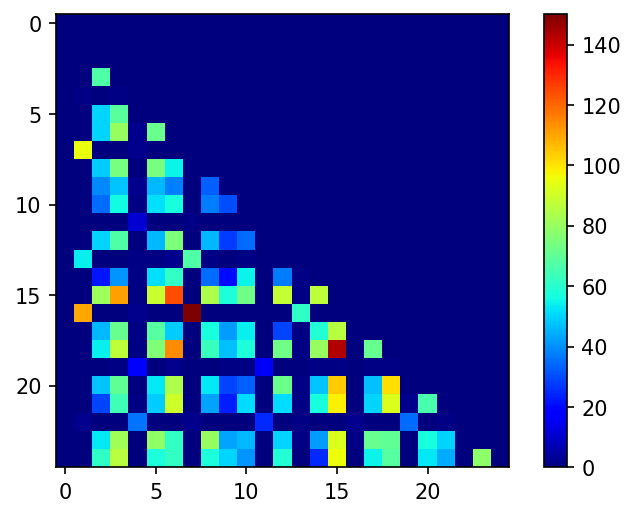

In [109]:
### count the pairs using only frequent items, store the count into the (triangular) matrix.

# pair_mat = pd.DataFrame(np.zeros((len(freq_items.index),len(freq_items.index))), 
#                         columns=freq_items.index, index=freq_items.index,
#                        dtype=int)

pair_mat_hashed = np.zeros((len(freq_items)+1,len(freq_items)+1))
# n = len(freq_items)
# triangular_arr = np.zeros((n*n,))


for b in baskets:
    cand_list = [item for item in b if item in freq_items]
    if len(cand_list)<2:
        continue
    for idx, item1 in enumerate(cand_list):
        for item2 in cand_list[idx+1:]:
            i = df_freq_item_hash.loc[item1,'hashcode'] 
            j = df_freq_item_hash.loc[item2,'hashcode'] 
            #triangular_arr[triangular_encode(i,j,n)] +=1
            #pair_mat.loc[item1, item2] += 1
            pair_mat_hashed[max(i,j),min(i,j)]+=1

# pair_mat
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=150)
plt.imshow(pair_mat_hashed, cmap='jet')
plt.colorbar()

In [110]:
### extract frequent pairs that exceed support s2 (assume s2 = 0.02), and hash back.

freq_pairs = [[df_freq_item_hash[df_freq_item_hash['hashcode']==x].index[0], df_freq_item_hash[df_freq_item_hash['hashcode']==y].index[0]] for x, y in zip(*np.where(pair_mat_hashed > 0.04*len(baskets)))]
freq_pairs
# freq_pairs = [[freq_itemset[x], freq_itemset[y]] for x, y in zip(*np.where(pair_mat.values > 0.02*len(baskets)))]

[['The Learning Leader Show With Ryan Hawk', 'Leveling Up with Eric Siu'],
 ['The Learning Leader Show With Ryan Hawk', 'Mindfulness Mode'],
 ['Wow in the World', 'Smash Boom Best'],
 ['Wow in the World', 'Story Pirates'],
 ['Discover Your Talent–Do What You Love | Build a Career of Success, Satisfaction and Freedom',
  'Mindfulness Mode'],
 ['Discover Your Talent–Do What You Love | Build a Career of Success, Satisfaction and Freedom',
  'The Learning Leader Show With Ryan Hawk'],
 ['Interactive Body Balance with Mike Daciuk',
  'The Learning Leader Show With Ryan Hawk'],
 ['Interactive Body Balance with Mike Daciuk',
  'Discover Your Talent–Do What You Love | Build a Career of Success, Satisfaction and Freedom']]